In [4]:
import pandas as pd
import numpy as np

import os

In [5]:
# Define the relative path to the CSV file
file_path = '../data_with_state.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,lat,lon,time,gws_inst,rtzsm_inst,sfsm_inst,start_date,end_date,week_no,STATE
0,12.375,92.875,02-01-2023,18.191570,12.279556,14.335435,02-01-2023,08-01-2023,4.0,ANDAMAN AND NICOBAR ISLANDS
1,12.625,92.875,02-01-2023,23.398462,18.300697,20.701302,02-01-2023,08-01-2023,4.0,ANDAMAN AND NICOBAR ISLANDS
2,12.375,92.875,09-01-2023,17.314518,9.416865,11.187888,09-01-2023,15-01-2023,21.0,ANDAMAN AND NICOBAR ISLANDS
3,12.625,92.875,09-01-2023,23.560562,11.538414,13.080875,09-01-2023,15-01-2023,21.0,ANDAMAN AND NICOBAR ISLANDS
4,12.375,92.875,16-01-2023,16.458113,14.406377,18.757080,16-01-2023,22-01-2023,38.0,ANDAMAN AND NICOBAR ISLANDS


In [6]:
data.dtypes

lat           float64
lon           float64
time           object
gws_inst      float64
rtzsm_inst    float64
sfsm_inst     float64
start_date     object
end_date       object
week_no       float64
STATE          object
dtype: object

In [7]:
# display shape
data.shape

(341810, 10)

In [9]:
data['STATE'].unique()

array(['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH',
       'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'DELHI', 'GOA',
       'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR',
       'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL'],
      dtype=object)

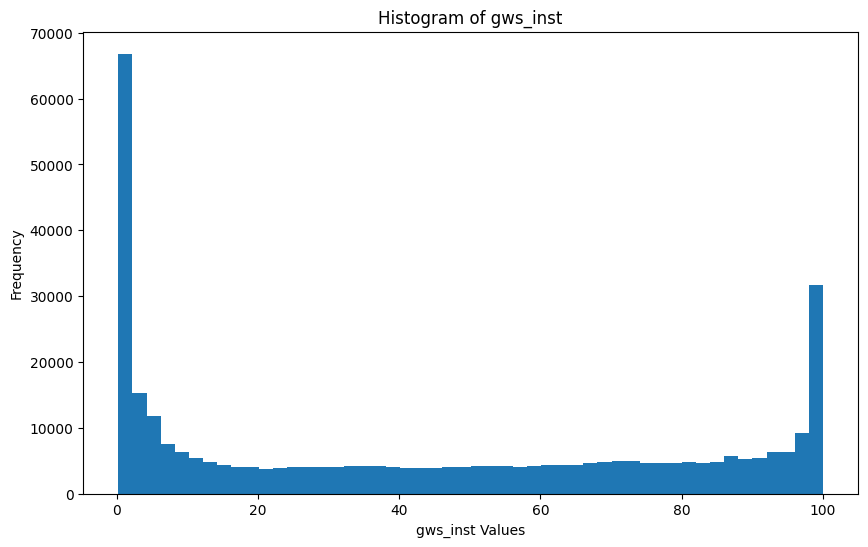

In [12]:
import matplotlib.pyplot as plt

data['gws_inst'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.title("Histogram of gws_inst")
plt.xlabel('gws_inst Values')
plt.show()


In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['gws_inst'].quantile(0.25)
Q3 = data['gws_inst'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['gws_inst'] < lower_bound) | (data['gws_inst'] > upper_bound)]

# Display the outliers
print(f"Number of outliers detected: {len(outliers)}")
outliers


Number of outliers detected: 0


,lat,lon,time,gws_inst,rtzsm_inst,sfsm_inst,start_date,end_date,week_no,STATE


<Axes: ylabel='Frequency'>

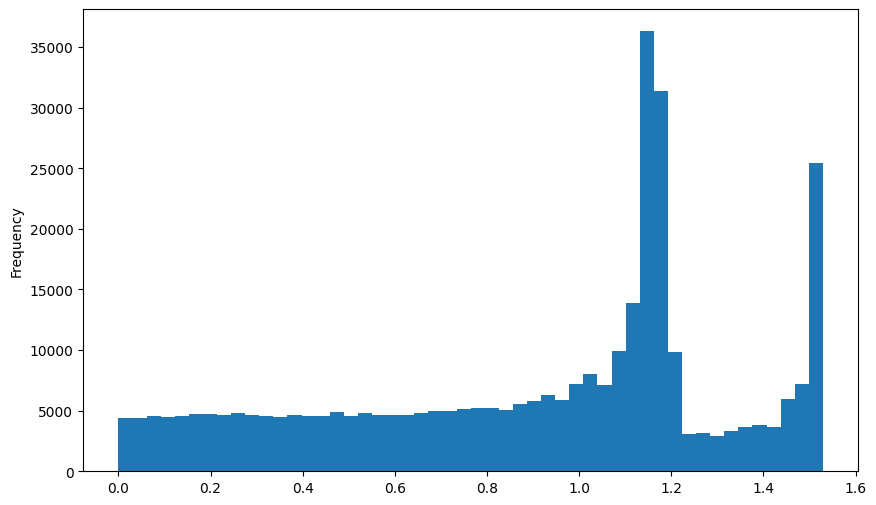

In [16]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the 'gws_inst' column
z_scores = np.abs(stats.zscore(data['gws_inst'].dropna()))  # Drop NA values before calculating Z-scores


z_scores.plot(kind='hist', bins=50, figsize=(10, 6))

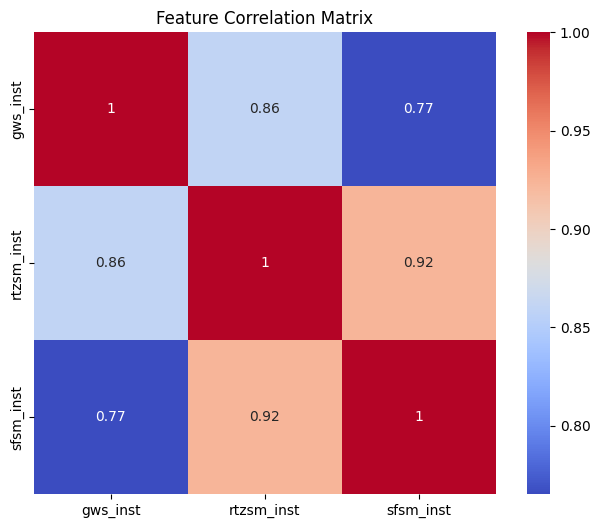

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Compute the correlation matrix
correlation_matrix = data[['gws_inst', 'rtzsm_inst', 'sfsm_inst']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features and target
features = data[['lat', 'lon']]
target = data['gws_inst']

# Normalize features and target
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Combine scaled features and target for the LSTM input
scaled_data = np.hstack((features_scaled, target_scaled))


In [45]:
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :-1])  # all columns except the last
        y.append(data[i + time_step, -1])  # only the target column
    return np.array(X), np.array(y)

# Define time step
time_step = 1  # You can experiment with this value

X, y = create_sequences(scaled_data, time_step)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))  # Output layer for the target variable

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\senna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array